Decision Tree Accuracy: 0.7093596059113301
Classification Report:
              precision    recall  f1-score   support

           0       0.63      0.75      0.69       602
           1       0.79      0.68      0.73       819

    accuracy                           0.71      1421
   macro avg       0.71      0.71      0.71      1421
weighted avg       0.72      0.71      0.71      1421



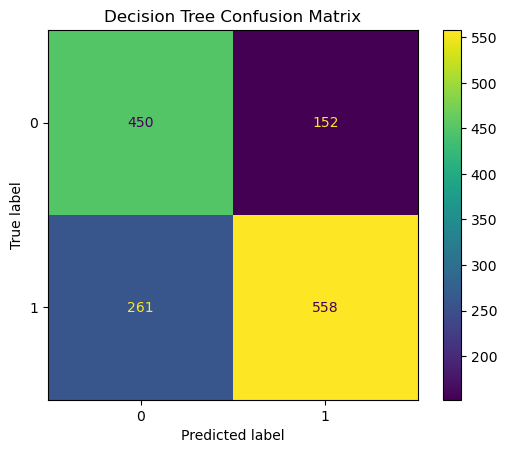

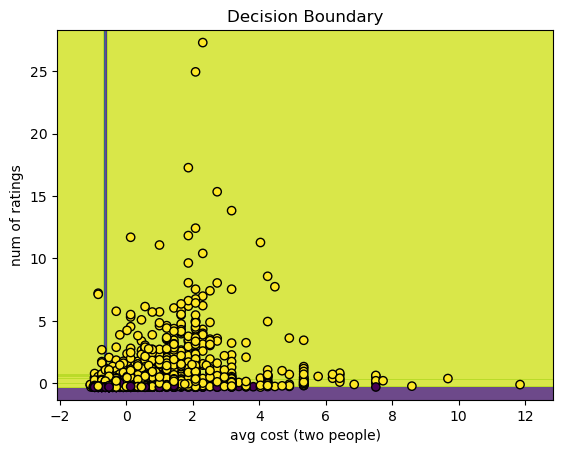

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

df = pd.read_csv('zomato.csv')

X = df.drop('rate (out of 5)', axis=1)
y = df['rate (out of 5)']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

tree = DecisionTreeClassifier(random_state=42)
tree.fit(X_train, y_train)

y_pred = tree.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Decision Tree Accuracy: {accuracy}")
print(f"Classification Report:\n{report}")

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=tree.classes_)
disp.plot()
plt.title("Decision Tree Confusion Matrix")
plt.show()

def plot_decision_boundary(X, y, model):
    h = .02  # step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o')
    plt.xlabel('avg cost (two people)')
    plt.ylabel('num of ratings')
    plt.title('Decision Boundary')
    plt.show()
    
plot_decision_boundary(X_train, y_train, tree)